In [15]:
from __future__ import annotations
import pandas as pd 
from scipy.stats.contingency import odds_ratio
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import itertools
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# load to dataframe
INFILE = '/home/grace/work/SEER/data/SEERPLUS_2010_2020.clean.tsv'
master = pd.read_csv(INFILE, header=0, sep='\t', na_values='.')

In [17]:
from util_funcs import do_basic_formatting
from util_funcs import do_basic_filtering
from util_funcs import format_regional_nodes_bins
from util_funcs import format_ln_status

print('\nBasic filtering')
df = do_basic_filtering(master)

HISTTYPES_PATH = '/home/grace/work/SEER/data/histology/histcodes.tsv'
print('\nBasic formatting')
df = do_basic_formatting(df, HISTTYPES_PATH)

df = format_regional_nodes_bins(df)
df = format_ln_status(df)
df['ln_status'].value_counts(dropna=False)

df.head()


Basic filtering
Removing records not in range (2010, 2020)
- removed 371509 records
Selecting records with MALIGNANT behavior
- removed 632160 records
Handling patients with multiple records of same cancer_type
- removed 82397 records
Removing records where any met value (except distant LN) is missing
- removed 720503 records

Final records: 3798014, patients: 3597365

Basic formatting
Missing 0 codes.
Formatting cancer subtypes
TNG, Grade standardisation


,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,distant_ln,any_met,hist_type_descr,TSTAGE_STD,NSTAGE_STD,GSTAGE_STD,GRADE_STD,regional_nodes_prop,regnodes_exam_bin,regnodes_pos_bin,regnodes_prop_bin,ln_status
4,139,"2,011.00",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.00,0.00,MALIGNANT,3,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NaN,NO,Infiltrating duct carcinoma [+ others],T3,N0,II,G3,0.00,"(0, 10]","(0, 10]","(0.00, 0.25]",NaN
5,142,NaN,2018,2020,70-74 years,Breast,Breast,Breast,Breast,T2,N0,IIA,NaN,NaN,NaN,G3,P,NEG,3.00,0.00,MALIGNANT,2,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,False,NO,Infiltrating duct carcinoma [+ others],T2,N0,II,G3,0.00,"(0, 10]","(0, 10]","(0.00, 0.25]",neither
6,194,NaN,2016,2020,55-59 years,Ovary,Ovary,Ovary,Ovary,T1c,N0,IC,P,P,NaN,G2,NaN,NEG,10.00,0.00,MALIGNANT,2,0,NaN,NaN,8441,"cystic, mucinous and serous neoplasms",NO,NO,NO,NO,False,NO,Serous carcinoma [+ others],T1,N0,I,G2,0.00,"(0, 10]","(0, 10]","(0.00, 0.25]",neither
7,220,NaN,2011,2020,70-74 years,Prostate,Prostate,Prostate,Prostate,T1c,N0,II,NaN,NaN,NaN,G2,NaN,NaN,0.00,NaN,MALIGNANT,2,0,6.60,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NO,Adenoma [+ others],T1,N0,II,G2,NaN,"(0, 10]",NaN,NaN,NaN
8,265,"2,016.00",2011,2016,65-69 years,Prostate,Prostate,Prostate,Prostate,T2c,N0,II,NaN,NaN,NaN,G3,NaN,NaN,0.00,NaN,MALIGNANT,2,0,7.70,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NO,Adenoma [+ others],T2,N0,II,G3,NaN,"(0, 10]",NaN,NaN,NaN


Relative risk / odds ratio of Met:

- No loco   -> Loco (only)
- No loco   -> Dist (only)
- No loco   -> Loco (any) 
- No loco   -> Dist (any)
- No loco   -> Loco & Dist
- Loco -> Dist (only) 
- Loco -> Dist (any)
- Loco -> Loco & Dist

```
Brain   ------|-x-----
Bone    ------|-----x-
Lung    ----x-|-------
Liver   ----x-|-------
```


  regnodes_prop_bin       NO   YES  records  prevalence (%) OR_STAT OR_CI_LOW OR_CI_HIGH   response  False  True
0      (0.00, 0.25]  1233712  1209  1234921            0.10       1         1          1  brain_met    NaN   NaN
1       (0.25, 0.5]   101529   324   101853            0.32    3.26      2.88       3.68  brain_met    NaN   NaN
2       (0.5, 0.75]    35648   169    35817            0.47    4.84      4.12       5.68  brain_met    NaN   NaN
3       (0.75, 1.0]    71827  1598    73425            2.18   22.70     21.06      24.47  brain_met    NaN   NaN
4      (0.00, 0.25]  1231318  3603  1234921            0.29       1         1          1   bone_met    NaN   NaN


  regnodes_prop_bin       NO   YES  records  prevalence (%) OR_STAT OR_CI_LOW OR_CI_HIGH   response  False  True
0      (0.00, 0.25]  1233712  1209  1234921            0.10       1         1          1  brain_met    NaN   NaN
1       (0.25, 0.5]   101529   324   101853            0.32    3.26      2.88       3.68  brain_met    NaN   NaN
2       (0.5, 0.75]    35648   169    35817            0.47    4.84      4.12       5.68  brain_met    NaN   NaN
3       (0.75, 1.0]    71827  1598    73425            2.18   22.70     21.06      24.47  brain_met    NaN   NaN
4      (0.00, 0.25]  1231318  3603  1234921            0.29       1         1          1   bone_met    NaN   NaN


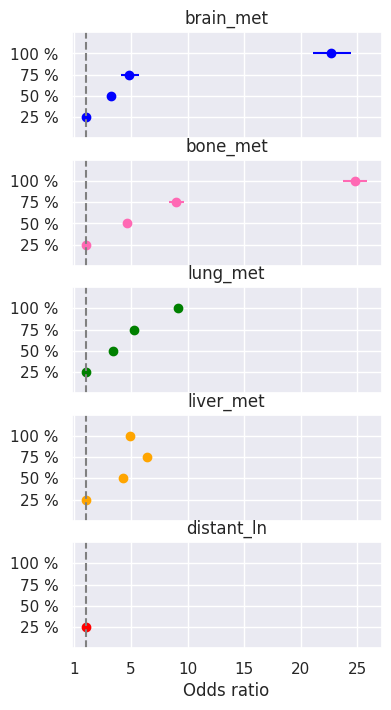

In [21]:
from typing import Tuple 
from util_funcs import calculate_met_stats
FEATURE = 'ln_status'

temp = df.dropna(subset=['regnodes_prop_bin'])
temp = df.dropna(subset=['ln_status'])
maintable = pd.DataFrame()
for response in ['brain_met', 'bone_met', 'lung_met', 'liver_met', 'distant_ln']:
    stats = calculate_met_stats(
        feature='regnodes_prop_bin',
        response=response,
        df=temp,
        baseline_fval='(0.00, 0.25]'
    )
    stats = stats.reset_index()
    stats['response'] = response
    maintable = pd.concat([maintable, stats], ignore_index=True)

print(maintable.head())

sns.set_theme()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(4, 8), sharex=True)

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]
ax3 = axes[3]
ax4 = axes[4]

categories = ['brain_met', 'bone_met', 'lung_met', 'liver_met', 'distant_ln']
target_axes = [ax0, ax1, ax2, ax3, ax4]
colors = ['blue', 'hotpink', 'green', 'orange', 'red']
for the_cat, the_axes, the_color in zip(categories, axes, colors):
    the_df = maintable[maintable['response']==the_cat]
    the_axes.set_ylim(0, 5)
    the_axes.set_yticks([1, 2, 3, 4])
    the_axes.set_yticklabels(['25 %', '50 %', '75 %', '100 %'])
    the_axes.set_xticks([])
    i = 1
    the_axes.axvline(1, c='grey', ls='--')
    for _, row in the_df.iterrows():
        the_axes.hlines(y=i, xmin=row['OR_CI_LOW'], xmax=row['OR_CI_HIGH'], colors=the_color)
        the_axes.scatter(row["OR_STAT"], i, marker='o', c=the_color)
        i += 1
        # the_axes.text(y=i, x=row['OR_STAT'], s=row[FEATURE])
        
    the_axes.set_title(the_cat)
ax4.set_xticks([0, 5, 10, 15, 20, 25])
ax4.set_xticklabels(['1', '5', '10', '15', '20', '25'])
ax4.set_xlabel('Odds ratio')
plt.show()

In [29]:
print(df['regional_nodes_examined'].value_counts(dropna=True).head(10))
print(df['regional_nodes_positive'].value_counts(dropna=True).head(10))

regional_nodes_examined
0.00     2016089
1.00      205053
2.00      181241
3.00      129516
4.00       88928
5.00       65197
6.00       52302
7.00       44053
12.00      43953
13.00      41007
Name: count, dtype: int64
regional_nodes_positive
0.00    1038930
1.00     179133
2.00      78585
3.00      44115
4.00      30030
5.00      21216
6.00      15759
7.00      12316
8.00       9792
9.00       7745
Name: count, dtype: int64


  ln_status      NO  YES  records  prevalence (%) OR_STAT OR_CI_LOW OR_CI_HIGH   response  False  True
0      both    4388  210     4598            4.57   34.30     29.30      40.15  brain_met    NaN   NaN
1      dist    1386   57     1443            3.95   29.47     22.38      38.81  brain_met    NaN   NaN
2      loco  191807  779   192586            0.40    2.91      2.63       3.23  brain_met    NaN   NaN
3   neither  490914  685   491599            0.14       1         1          1  brain_met    NaN   NaN
4      both    3760  838     4598           18.23   68.73     62.84      75.17   bone_met    NaN   NaN


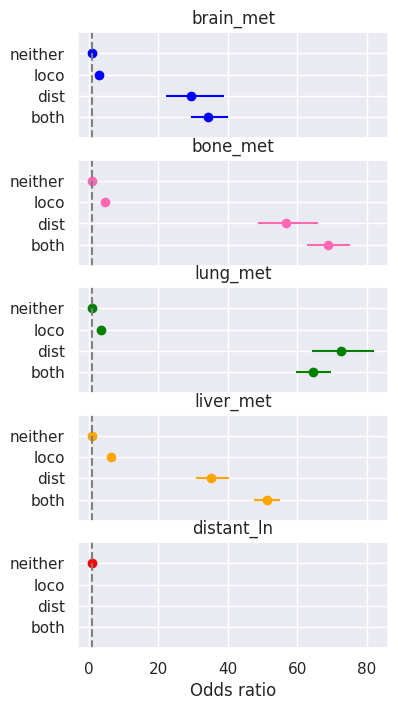

In [24]:
from typing import Tuple 
from util_funcs import calculate_met_stats
FEATURE = 'ln_status'
BASE = 'neither'

temp = df.dropna(subset=[FEATURE])
maintable = pd.DataFrame()
for response in ['brain_met', 'bone_met', 'lung_met', 'liver_met', 'distant_ln']:
    stats = calculate_met_stats(
        feature=FEATURE,
        response=response,
        df=temp,
        baseline_fval=BASE
    )
    stats = stats.reset_index()
    stats['response'] = response
    maintable = pd.concat([maintable, stats], ignore_index=True)

print(maintable.head())

sns.set_theme()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(4, 8), sharex=True)

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]
ax3 = axes[3]
ax4 = axes[4]

categories = ['brain_met', 'bone_met', 'lung_met', 'liver_met', 'distant_ln']
target_axes = [ax0, ax1, ax2, ax3, ax4]
colors = ['blue', 'hotpink', 'green', 'orange', 'red']
for the_cat, the_axes, the_color in zip(categories, axes, colors):
    the_df = maintable[maintable['response']==the_cat]
    the_axes.set_ylim(0, 5)
    the_axes.set_yticks([1, 2, 3, 4])
    the_axes.set_yticklabels(the_df[FEATURE].to_list())
    the_axes.set_xticks([])
    i = 1
    the_axes.axvline(1, c='grey', ls='--')
    for _, row in the_df.iterrows():
        the_axes.hlines(y=i, xmin=row['OR_CI_LOW'], xmax=row['OR_CI_HIGH'], colors=the_color)
        the_axes.scatter(row["OR_STAT"], i, marker='o', c=the_color)
        i += 1
        # the_axes.text(y=i, x=row['OR_STAT'], s=row[FEATURE])
        
    the_axes.set_title(the_cat)
ax4.set_xticks([0, 20, 40, 60, 80])
# ax4.set_xticklabels(['1', '10', '20', '30', '40', '50', '60', '70', '80'])
ax4.set_xlabel('Odds ratio')
plt.show()

In [ ]:

def calc_direct_odds_ratio(pred_field: str, class1: str, class2: str, res_field: str, df) -> Tuple[float, float, float]:
    yn_df = df.groupby(by=[pred_field, res_field]).size().unstack(fill_value=0)
    counts = yn_df.reset_index()
    if 'YES' not in counts.columns:
        counts['YES'] = 0
    if 'NO' not in counts.columns:
        counts['NO'] = 0
    counts = counts.set_index(pred_field, drop=True)
    print(counts)

    counts = counts[counts[pred_field].isin([class1, class2])]
    print(counts)

    res = odds_ratio(counts, kind='sample')
    ci = res.confidence_interval(confidence_level=0.95)
    print(f'OR: {res.statistic}, CI_LOW: {ci.low}, CI_HIGH: {ci.high}')
    return res.statistic, ci.low, ci.high

In [ ]:
df.head()

In [ ]:
from util_funcs import calculate_met_stats

stats = calculate_met_stats(
    feature='ln_status',
    response='brain_met',
    df=temp,
    cohort_no=3950523,
    cohort_yes=66108,
)


In [ ]:
# stats = stats.reset_index()
order = ['neither', 'loco', 'loco_only', 'dist', 'dist_only', 'both']
# stats['ln_status'] = pd.Categorical(stats.ln_status, ordered=True, categories=order)
# stats = stats.sort_values('ln_status')
sns.barplot(data=stats, x='ln_status', y='prevalence (%)', hue='ln_status')
stats

In [ ]:

odds_table = pd.DataFrame(columns=['stat', 'ci_low', 'ci_high'])

for res in ['brain_met', 'bone_met', 'lung_met', 'liver_met']:
    stat, ci_low, ci_high = calc_direct_odds_ratio(
        pred_field='ln_status',
        res_field=res,
        class1='',
        class2='',
        df=df
    )
    